In [76]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from transform_factory import resize_322, center_crop_224
from captum.attr import visualization as viz

In [122]:
seed = 0
expl_method = "LayerXAct"
data_num = 17

In [123]:
with open(f"./val_seed_{seed}.npy", "rb") as f:
    filepath_list = np.load(f)

for filepath in filepath_list[data_num:data_num+1]:
    print(filepath)
    img_name = os.path.basename(filepath)
    print(img_name)

    results_path = f"results/val_seed_{seed}_pred_orig_eval_orig_transform_both_sign_all_reduction_sum/{img_name}_expl_{expl_method}_sample_2000_sigma_0.05_seed_{seed}_results.pkl"

    with open(results_path, "rb") as f:
        results = np.load(f, allow_pickle=True)

/home/juhyeon/Imagenet/val/n03325584/ILSVRC2012_val_00045538.JPEG
ILSVRC2012_val_00045538.JPEG


In [124]:
for res in results:
    print(res['zero_contain_rate'])

0.6423389668367347
0.5534518494897959
0.5172393176020408
0.4878427933673469
0.4551578443877551
0.4130859375
0.3886120854591837
0.37216996173469385
0.3575414540816326
0.3423549107142857
0.3266701211734694
0.3106664540816326
0.295101243622449
0.26990991709183676
0.23744419642857142
0.20057397959183673
0.15427694515306123
0.09962930484693877
0.040357940051020405


tensor(0.9459)


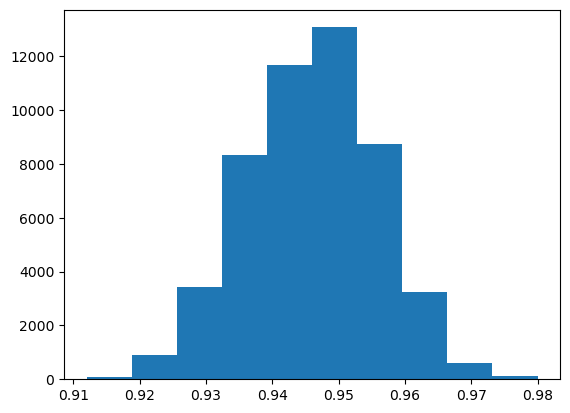

In [125]:
plt.hist(results[0]['coverage_prob'].flatten())
# plt.xlim(0, 1, 0.05)

print(results[0]['coverage_prob'].flatten().mean())

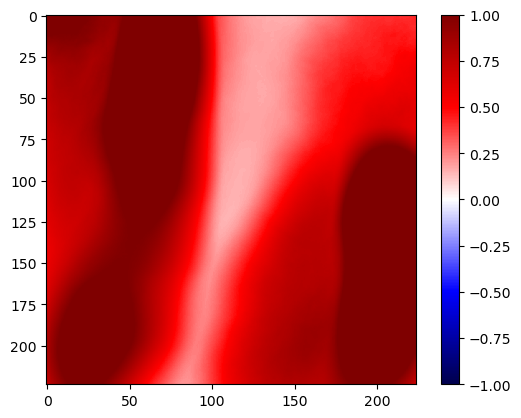

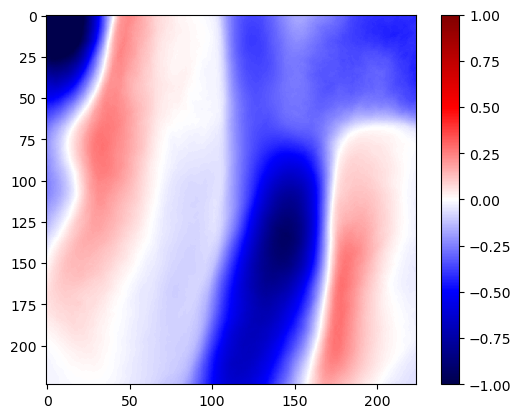

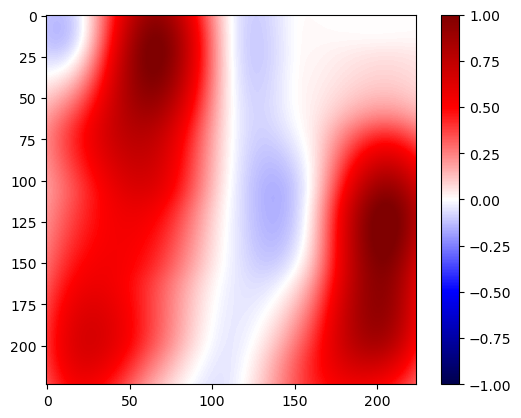

In [129]:
plt.imshow(results[0]['conf_high'].squeeze(), cmap="seismic")
plt.clim(-1, 1)
plt.colorbar()
plt.show()

plt.imshow(results[0]['conf_low'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()

plt.imshow(results[0]['orig_expl'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()


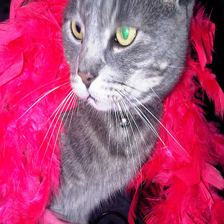

In [127]:
center_crop_224(resize_322(Image.open(filepath_list[data_num])))
